# WSL xG player blocking analysis
How does xG vary with regards to players in front of the shot?

In [19]:
from statsbombpy import sb
from utils.statsbomb_wrappers import Competitions, Match, Season, ignore_warnings, PitchDim
import pandas as pd
from mplsoccer import Pitch

import matplotlib.pyplot as plt

# ignore_warnings()

In [3]:
competitions = Competitions()
season = competitions.get_season("FA Women's Super League", "2020/2021")

In [4]:
matches = season.get_matches()
all_shots = pd.concat([Match(match_id=match_id).get_events(type="Shot") for match_id in matches["match_id"]])
non_penalty_shots = all_shots.loc[all_shots["shot_type"] != "Penalty"]

In [9]:
non_penalty_shots.head().dropna(axis=1)

,duration,id,index,location,match_id,minute,period,play_pattern,player,player_id,...,shot_end_location,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type,team,timestamp,type
3615,0.154537,7b6ab918-87a4-4933-85b7-d8965938a45e,92,"[100.6, 54.6]",3775648,1,1,From Keeper,Stine Larsen,10102.0,...,"[103.2, 52.2]","[{'location': [101.1, 63.7], 'player': {'id': ...",d6a56e56-0598-4985-8f1e-44b87591e2cf,Blocked,0.032441,Normal,Open Play,Aston Villa,00:01:27.151,Shot
3616,0.698834,0ba83eaf-b15d-4879-9ee5-cba49421bd89,278,"[109.4, 43.0]",3775648,5,1,From Corner,Vivianne Miedema,15623.0,...,"[111.5, 49.2]","[{'location': [115.7, 38.0], 'player': {'id': ...",c23b0878-5af1-4f89-b172-167e5174415b,Wayward,0.046658,Normal,Open Play,Arsenal WFC,00:05:21.756,Shot
3617,0.234688,ea3ebaf8-8dcd-4147-8e41-272d77cd3546,338,"[95.6, 38.9]",3775648,6,1,From Throw In,Jill Roord,10650.0,...,"[101.0, 40.6]","[{'location': [101.7, 37.2], 'player': {'id': ...",fb0949dd-5e3a-44cd-a9e5-b77835b37ab8,Blocked,0.047767,Normal,Open Play,Arsenal WFC,00:06:57.808,Shot
3618,1.114746,85b4eba6-a1b6-4665-85bb-c5de41a0e74d,460,"[95.6, 44.6]",3775648,10,1,From Throw In,Bethany Mead,15619.0,...,"[120.0, 33.9, 0.5]","[{'location': [98.4, 20.4], 'player': {'id': 4...",71f563b8-061c-4b4e-8cc9-e32ef8990e9f,Off T,0.026943,Normal,Open Play,Arsenal WFC,00:10:06.492,Shot
3619,0.643929,c6ff3786-bf7f-4f81-ac6d-3acccf21073b,609,"[111.0, 33.7]",3775648,14,1,From Corner,Leah Williamson,18999.0,...,"[120.0, 34.5, 6.2]","[{'location': [112.2, 36.0], 'player': {'id': ...",7875329c-e223-4a63-afce-ac588596dea7,Off T,0.125549,Half Volley,Open Play,Arsenal WFC,00:14:50.232,Shot


In [16]:
shot = non_penalty_shots.iloc[0]
shot.dropna()

duration                                                       0.154537
id                                 7b6ab918-87a4-4933-85b7-d8965938a45e
index                                                                92
location                                                  [100.6, 54.6]
match_id                                                        3775648
minute                                                                1
period                                                                1
play_pattern                                                From Keeper
player                                                     Stine Larsen
player_id                                                       10102.0
position                                            Left Center Forward
possession                                                            5
possession_team                                             Aston Villa
possession_team_id                                              

In [17]:
shot.shot_freeze_frame

[{'location': [101.1, 63.7],
  'player': {'id': 25610, 'name': 'Mana Iwabuchi'},
  'position': {'id': 22, 'name': 'Right Center Forward'},
  'teammate': True},
 {'location': [118.5, 41.5],
  'player': {'id': 5066, 'name': 'Lydia Grace Yilkari Williams'},
  'position': {'id': 1, 'name': 'Goalkeeper'},
  'teammate': False},
 {'location': [101.8, 49.0],
  'player': {'id': 46539, 'name': 'Nadine Hanssen'},
  'position': {'id': 13, 'name': 'Right Center Midfield'},
  'teammate': True},
 {'location': [96.9, 65.5],
  'player': {'id': 10192, 'name': 'Jordan Nobbs'},
  'position': {'id': 17, 'name': 'Right Wing'},
  'teammate': False},
 {'location': [99.7, 60.6],
  'player': {'id': 10405, 'name': 'Lia Wälti'},
  'position': {'id': 10, 'name': 'Center Defensive Midfield'},
  'teammate': False},
 {'location': [103.4, 58.0],
  'player': {'id': 15620, 'name': 'Katie McCabe'},
  'position': {'id': 6, 'name': 'Left Back'},
  'teammate': False},
 {'location': [102.2, 36.1],
  'player': {'id': 10404, '

Text(0.5, 1.0, 'Shot by Stine Larsen, Half 1 minute 1, xG 0.03244112')

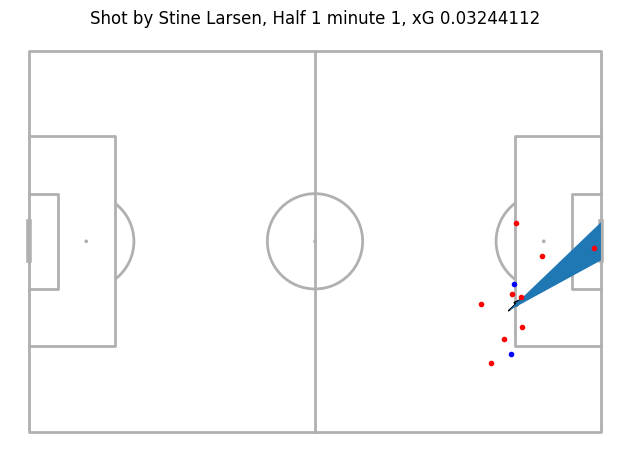

In [22]:
pitch = Pitch()
fig, ax = pitch.draw()

ax.plot(
    [player["location"][0] for player in shot.shot_freeze_frame if player["teammate"]],
    [player["location"][1] for player in shot.shot_freeze_frame if player["teammate"]],
    "b.",
)
ax.plot(
    [player["location"][0] for player in shot.shot_freeze_frame if not player["teammate"]],
    [player["location"][1] for player in shot.shot_freeze_frame if not player["teammate"]],
    "r.",
)

def plt_arrow(ax, start: tuple, end: tuple):
    ax.arrow(
        start[0],
        start[1],
        end[0] - start[0],
        end[1] - start[1],
        head_width=1,
        length_includes_head=True,
    )

plt_arrow(ax, shot["location"], shot["shot_end_location"])

pitch.goal_angle(shot["location"][0], shot["location"][1], ax=ax)

ax.set_title(f"Shot by {shot.player}, Half {shot.period} minute {shot.minute}, xG {shot.shot_statsbomb_xg}")